# K Nearest Neighbors - Classification

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions). KNN has been used in statistical estimation and pattern recognition already in the beginning of 1970’s as a non-parametric technique. 

A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function. If K = 1, then the case is simply assigned to the class of its nearest neighbor. 

<img src='../../img/KNN_similarity.png'>

It should also be noted that all three distance measures are only valid for continuous variables. In the instance of categorical variables the **Hamming distance** must be used. It also brings up the issue of standardization of the numerical variables between 0 and 1 when there is a mixture of numerical and categorical variables in the dataset.

<img src='../../img/KNN_hamming.png'>

For example, Consider the following data concerning credit default. Age and Loan are two numerical variables (predictors) and Default is the target.

<img src='../../img/KNN_example_1.png' height="600" width="800">

We can now use the training set to classify an unknown case (Age=48 and Loan=$142,000) using Euclidean distance. If K=1 then the nearest neighbor is the last case in the training set with Default=Y.

$ D = Sqrt[(48-33)^2 + (142000-150000)^2] = 8000.01  >> Default=Y $

<img src='../../img/KNN_example_2.png' height="600" width="800">

### Code Dictionary
code | description
-----|------------
`KNeighborsClassifier()` | K Nearest Neighbor Classification.
`.meshgrid` |  Generate a matrix of the the specified ranges.
`confusion_matrix` |  Describe the confusion matrix displaying the ratio of the actual and prediction models output.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [6]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
X = dataset[['Age','EstimatedSalary']].values
y = dataset['Purchased'].values

### We are interested to predict whether if someone buy through the ad

In [13]:
dataset.groupby('Purchased').count()['User ID']

Purchased
0    257
1    143
Name: User ID, dtype: int64

In [14]:
143/(143+257)

0.3575

Following the Supervised Learning steps

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

We invoke the classifier model

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski')

In [21]:
#KNeighborsClassifier?

In [22]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
y_pred_class = classifier.predict(X_test)

In [26]:
#X_test

In [29]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [24]:
y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_test, y_pred_class)

array([[55,  3],
       [ 1, 21]])

In [30]:
(21+55)/(55+3+1+21)

0.95

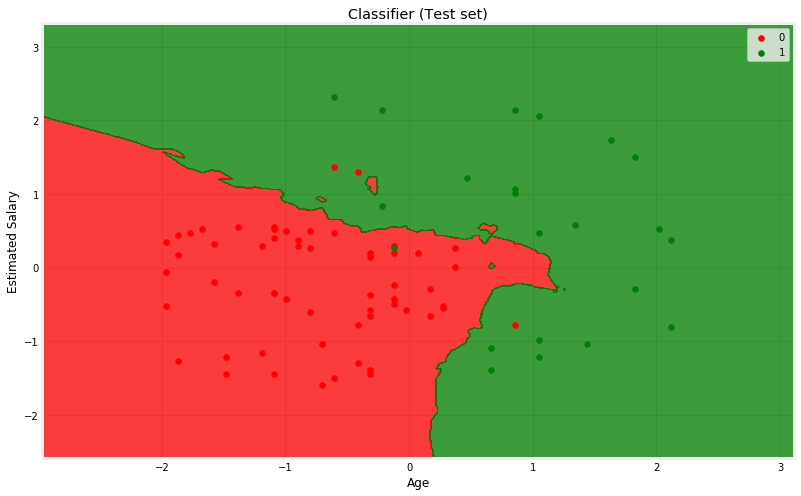

In [32]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(12, 8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Classification Metrics

In [34]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, accuracy_score

### Accuracy Score

![Accuracy](../../img/acc.gif)

This works well only if there are equal number of samples belonging to each class.

In [35]:
accuracy_score(y_test, y_pred_class)

0.95

### Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

<img style="float:left;" src="https://image.slidesharecdn.com/finalcustlingprofiling-160226163538/95/customer-linguistic-profiling-10-638.jpg?cb=1456504658" width=600 height=300>

In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_class))

[[55  3]
 [ 1 21]]


The confusion matrix enables us to derive other important classification metrics:

- *Precision* : It is the number of correct positive results divided by the number of positive results predicted by the classifier.
- *Recall* : It is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive).
- *F1-Score* : It is the Harmonic Mean between precision and recall. It tries to find the balance between precision and recall.

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

             precision    recall  f1-score   support

          0       0.98      0.95      0.96        58
          1       0.88      0.95      0.91        22

avg / total       0.95      0.95      0.95        80



### Area Under Curve
Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

True Positive Rate (Sensitivity) :  True Positive Rate corresponds to the proportion of positive data points that are correctly considered as positive, with respect to all positive data points.

![tpr](../../img/tpr.gif)

False Positive Rate (Specificity) : False Positive Rate corresponds to the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points.

![fpr](../../img/fpr.gif)

#### Let's create a template

In [38]:
#from sklearn.svm import SVC
#X, y = make_classification(n_samples=1000)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#clf = SVC(probability=True).fit(X_train, y_train)
#y_pred = clf.predict_proba(X_test)

In [39]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [43]:
roc_curve(y_test, y_pred_class)

(array([0.        , 0.05172414, 1.        ]),
 array([0.        , 0.95454545, 1.        ]),
 array([2, 1, 0]))

In [40]:
def plot_roc(y_test, clf):
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, ths = roc_curve(y_test, y_pred)
    auc_val = auc(fpr, tpr)
    ax1.plot(fpr, tpr, color="red", label="AUC = {0:.2f}".format(auc_val))
    ax1.set_xlabel("False Positive Rate")
    ax1.set_ylabel("True Positive Rate")
    plt.title("ROC Curve\n")
    ax1.set_xlim((-0.01, 1.01))
    ax1.set_ylim((-0.01, 1.01))
    ax1.set_xticks(np.linspace(0, 1, 11))
    ax1.plot([0, 1], [0, 1], color="blue")
    ax1.legend(loc="lower right")

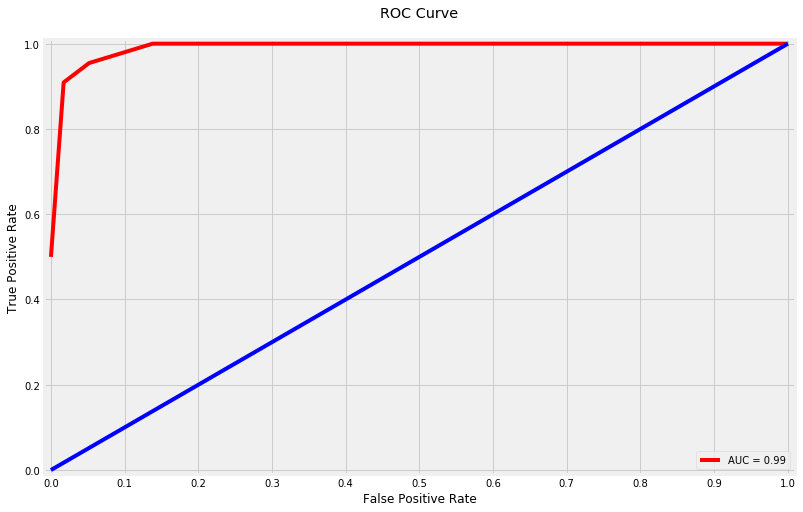

In [41]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)
plot_roc(y_test, classifier)#clf)

In [44]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

# Model Evaluation

- Goal has been to predict the **response value** of an **unknown observation**
    - predict the species of an unknown iris
- Made predictions using KNN models with **different values of K**
- Need a way to choose the **"best" model**: the one that "generalizes" to "out-of-sample" data

**Solution:** Create a procedure that **estimates** how well a model is likely to perform on out-of-sample data and use that to choose between models.

**Note:** These procedures can be used with **any machine learning model**, not only KNN.

### Using the train/test split procedure (K=1)

In [47]:
#train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print (accuracy_score(y_test, knn.predict(X_test)))

0.875


#### Increasing the neighbors

In [48]:
classifier50 = KNeighborsClassifier(n_neighbors=51)
classifier50.fit(X_train, y_train)
print (accuracy_score(y_test, classifier50.predict(X_test)))

0.9375


#### Searching for the "best" value of K

Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100

In [49]:
k_range = range(1, 101)
training_error = []
testing_error = []

for k in k_range:
    # instantiate the model with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)

    # calculate training error
    knn.fit(X, y)
    y_pred_class = knn.predict(X)
    training_accuracy = accuracy_score(y, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # calculate testing error
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    testing_accuracy = accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

In [51]:
#training_error

Creating a DataFrame of K, training error, and testing error

In [52]:
df = pd.DataFrame({'K': k_range,
                   'training error':training_error,
                   'testing error':testing_error}).set_index('K').sort_index(ascending=False)

In [54]:
df.head()

,training error,testing error
K,,
100,0.2350,0.0875
99,0.2350,0.0875
98,0.2350,0.0875
97,0.2325,0.0875
96,0.2325,0.0875


Plotting the relationship between K (HIGH TO LOW) and TESTING ERROR

### Training error versus testing error

Text(0,0.5,'Error (lower is better)')

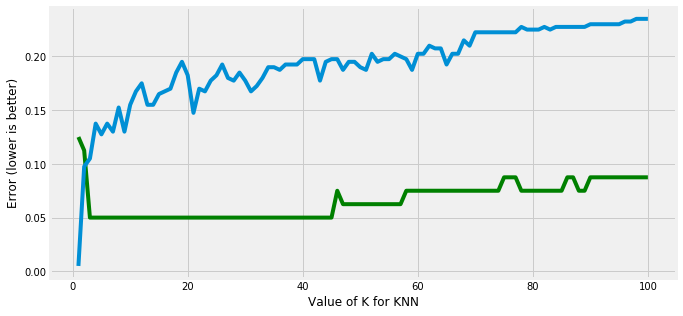

In [55]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['testing error'], color='g')
plt.plot(df.index, df['training error'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Error (lower is better)')

- **Training error** decreases as model complexity increases (lower value of K)
- **Testing error** is minimized at the optimum model complexity

In [56]:
# find the minimum testing error and the associated K value
df.sort_values(by=['testing error']).head()

,training error,testing error
K,,
19,0.1950,0.05
16,0.1675,0.05
17,0.1700,0.05
31,0.1675,0.05
32,0.1725,0.05


What could we conclude?

![Bias-variance tradeoff](../../img/training_testing_error.png)